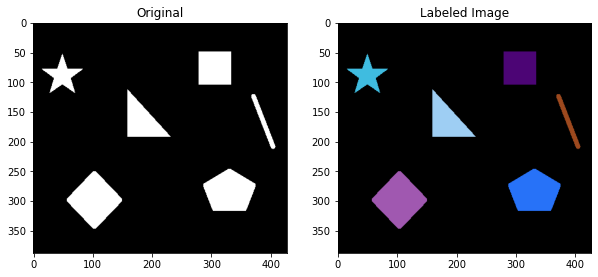

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

def random_rgb_colors(num_colors):
    return np.random.randint(0, 256, size=(num_colors, 3), dtype=np.uint8)

img = cv2.imread("images/shapes.png", 0)
_, img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
num_labels, labels = cv2.connectedComponents(img)

# Map component labels to random RGB colors
colors = random_rgb_colors(num_labels)
label_colors = colors[labels]
labeled_img = label_colors.astype(np.uint8)

# set background label to black
labeled_img[labels == 0] = [0, 0, 0]

plt.figure(figsize=[10, 8])
plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.title("Original")

plt.subplot(122)
plt.imshow(labeled_img)
plt.title("Labeled Image")

plt.show()


In [18]:
import cv2
import numpy as np

# Read the input image (make sure it's a binary image)
image = cv2.imread('images/persian-digits.jpg', cv2.IMREAD_GRAYSCALE)

# Apply thresholding to create a binary image
_, binary_image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)
binary_image = 255-binary_image

# Use connectedComponents to label connected components
num_labels, labels = cv2.connectedComponents(binary_image, connectivity=8)

# Iterate through each connected component
for label in range(1, num_labels):
    # Create a mask for the current connected component
    component_mask = np.uint8(labels == label) * 255
        
    # Display or save the connected component
    cv2.imshow(f'Connected Component {label}', component_mask)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [19]:
import cv2
import numpy as np

# Read the input image (make sure it's a binary image)
image = cv2.imread('images/persian-digits.jpg', cv2.IMREAD_GRAYSCALE)

# Apply thresholding to create a binary image
_, binary_image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)
binary_image = 255-binary_image

# Use connectedComponentsWithStats to obtain labels and bounding boxes
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(binary_image, connectivity=8)

# Iterate through each connected component
for label in range(1, num_labels):
    # Get the bounding box of the current connected component
    x, y, w, h = stats[label][:4]

    # Crop the connected component using the bounding box
    connected_component = image[y:y+h, x:x+w]
    
    # Display or save the cropped connected component
    cv2.imshow(f'Cropped Component {label}', connected_component)
    cv2.waitKey(0)
    cv2.destroyAllWindows()